In [16]:
# Importing neccessary packages
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import recall_score, accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from imblearn.combine import SMOTEENN
from sklearn.feature_selection import SelectKBest
from collections import Counter

# ignore warning
import warnings
warnings.filterwarnings('ignore')
import matplotlib.ticker as mtick # for showing percentage in it

In [73]:

df = pd.read_csv(r"C:\Users\Asus\Downloads\Telco-Customer-Churn (1).csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [74]:
# Features types
df.dtypes


customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [75]:
# Total charges are in object dtype so convert into Numerical feature 
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [76]:
# numerical feature
numerical_feature = {feature for feature in df.columns if df[feature].dtypes != 'O'}
print(f'Count of Numerical feature: {len(numerical_feature)}')
print(f'Numerical feature are:\n {numerical_feature}')

Count of Numerical feature: 4
Numerical feature are:
 {'tenure', 'SeniorCitizen', 'TotalCharges', 'MonthlyCharges'}


In [77]:
# Categorical feature
categorical_feature = {feature for feature in df.columns if df[feature].dtypes == 'O'}
print(f'Count of Categorical feature: {len(categorical_feature)}')
print(f'Categorical feature are:\n {categorical_feature}')


Count of Categorical feature: 17
Categorical feature are:
 {'MultipleLines', 'customerID', 'DeviceProtection', 'PaymentMethod', 'Churn', 'OnlineBackup', 'StreamingMovies', 'PaperlessBilling', 'InternetService', 'OnlineSecurity', 'Dependents', 'TechSupport', 'Contract', 'PhoneService', 'StreamingTV', 'Partner', 'gender'}


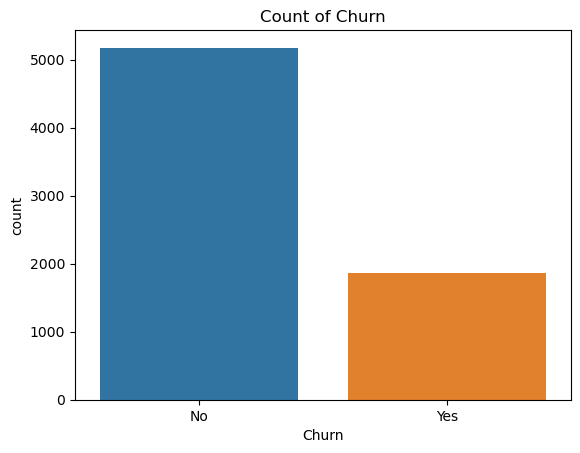

In [78]:
# plotting with target feature
sns.countplot(data=df, x='Churn')
plt.title('Count of Churn')
plt.show()

In [79]:
l1 = df.loc[df['Churn']== 'Yes'].count()[0]
print(f"Pecentage of Left: {l1/len(df['Churn'])}")
print(df.Churn.value_counts())

Pecentage of Left: 0.2653698707936959
No     5174
Yes    1869
Name: Churn, dtype: int64


In [80]:
### How many amount loss from customer churn
loss = []
for values in df.loc[df['Churn'] == 'Yes', 'TotalCharges']:
    value = float(values)
    loss.append(value)
print(np.round(sum(loss)))

2862927.0


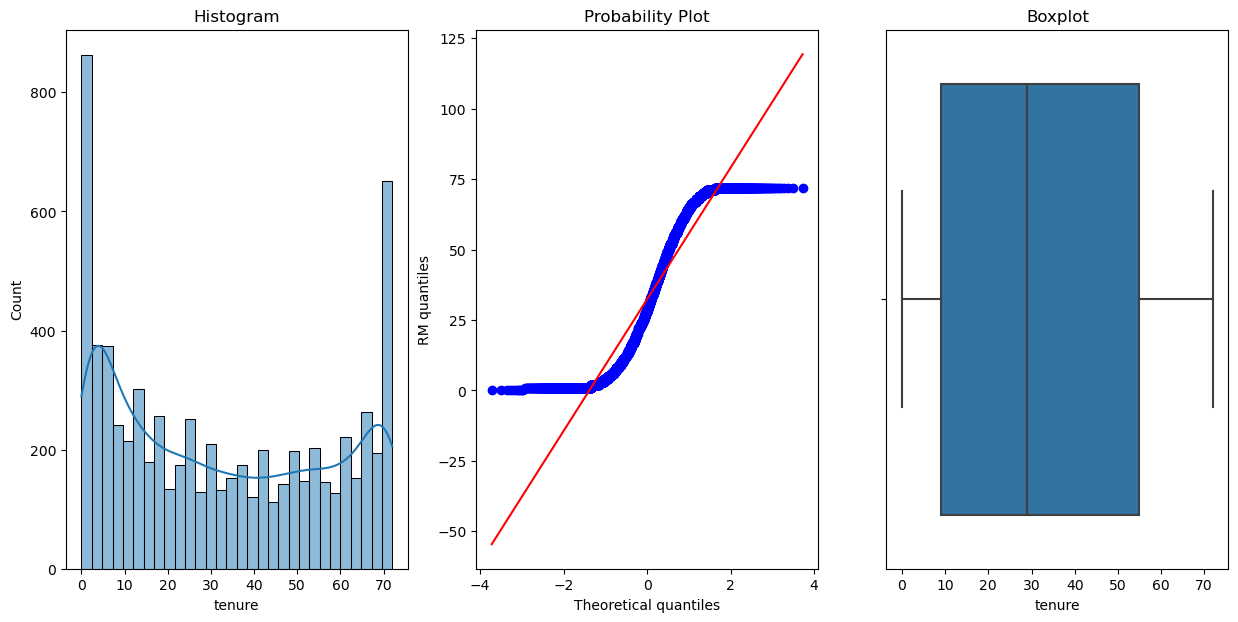

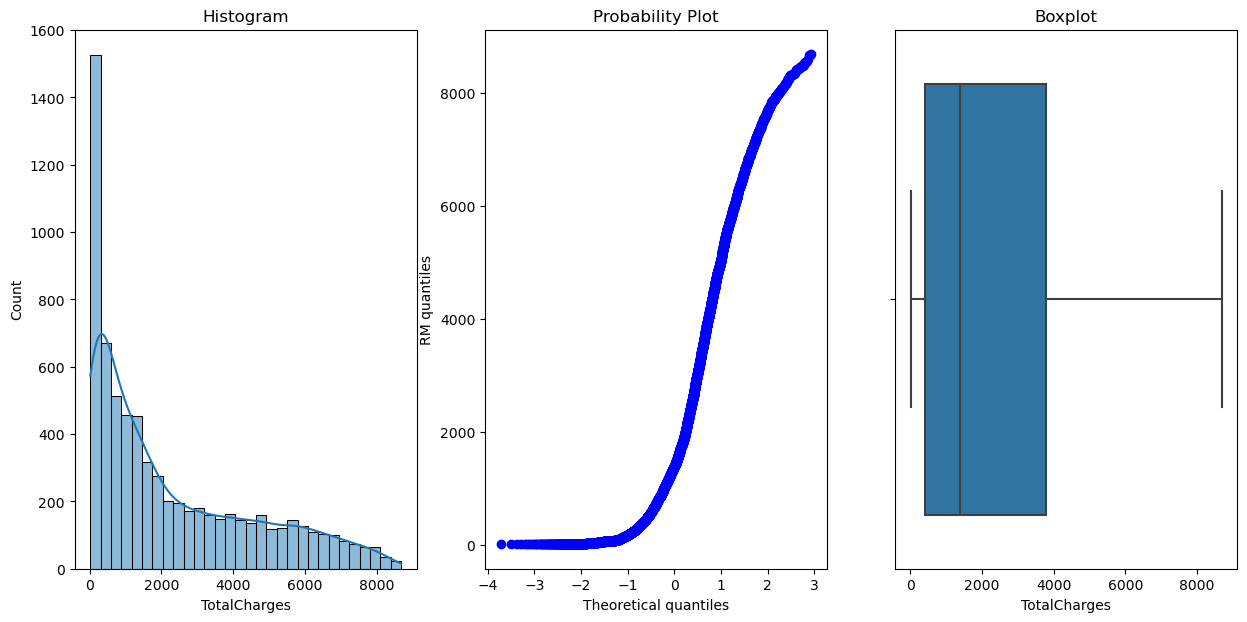

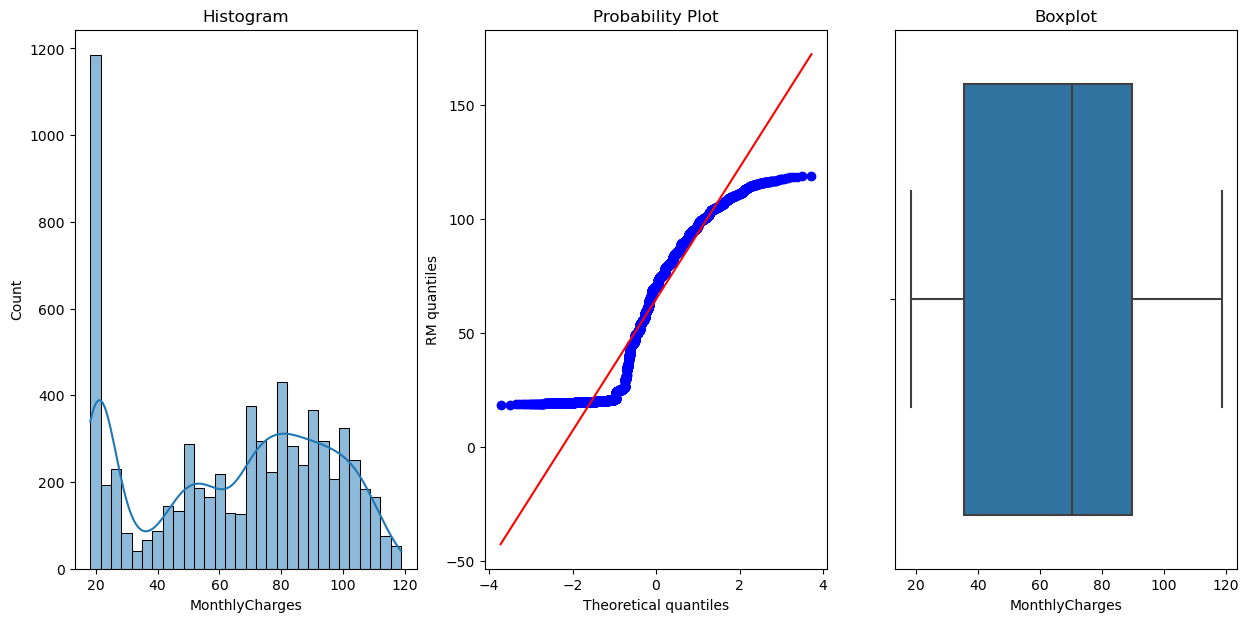

In [81]:
### Plotting numerical feature with probability distribution and checking outlier
for feature in numerical_feature:
    if feature != 'SeniorCitizen':
        plt.figure(figsize=(15,7))
    
        plt.subplot(1, 3, 1)
        sns.histplot(data=df, x=feature, bins=30, kde=True)
        plt.title('Histogram')
    
        plt.subplot(1, 3, 2)
        stats.probplot(df[feature], dist="norm", plot=plt)
        plt.ylabel('RM quantiles')
    
        plt.subplot(1, 3, 3)
        sns.boxplot(x=df[feature])
        plt.title('Boxplot')
    
plt.show()

In [82]:
df.isnull().sum()


customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [83]:
# replace NaN values with mean value
df.TotalCharges = df.TotalCharges.fillna(df.TotalCharges.median())

<Axes: >

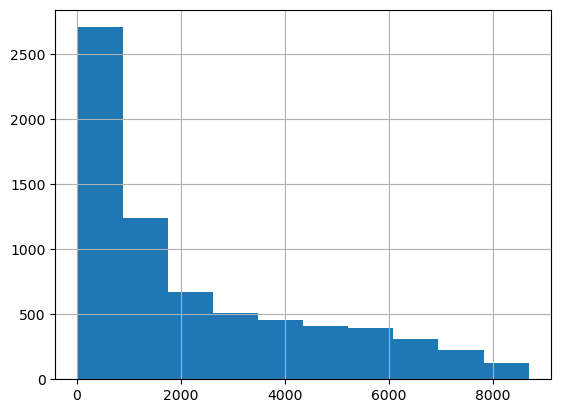

In [84]:
df.TotalCharges.hist()


In [85]:
encoder = LabelEncoder()
for feature in categorical_feature:
    df[feature] = encoder.fit_transform(df[feature])

In [86]:
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5375,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,2,29.85,29.85,0
1,3962,1,0,0,0,34,1,0,0,2,...,2,0,0,0,1,0,3,56.95,1889.50,0
2,2564,1,0,0,0,2,1,0,0,2,...,0,0,0,0,0,1,3,53.85,108.15,1
3,5535,1,0,0,0,45,0,1,0,2,...,2,2,0,0,1,0,0,42.30,1840.75,0
4,6511,0,0,0,0,2,1,0,1,0,...,0,0,0,0,0,1,2,70.70,151.65,1


In [87]:
df.drop(columns=['customerID'], inplace=True)

<Axes: >

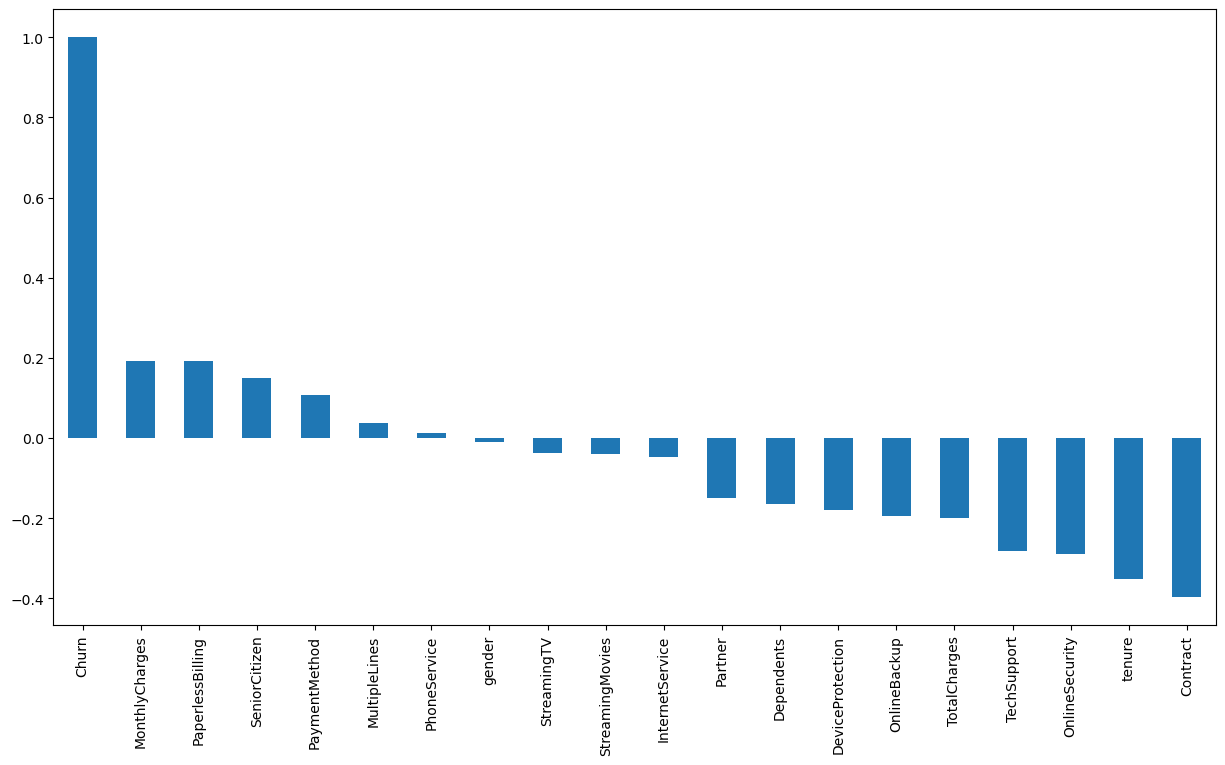

In [88]:

#Get Correlation of "Churn" with other variables:
plt.figure(figsize=(15,8))
df.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

<Axes: >

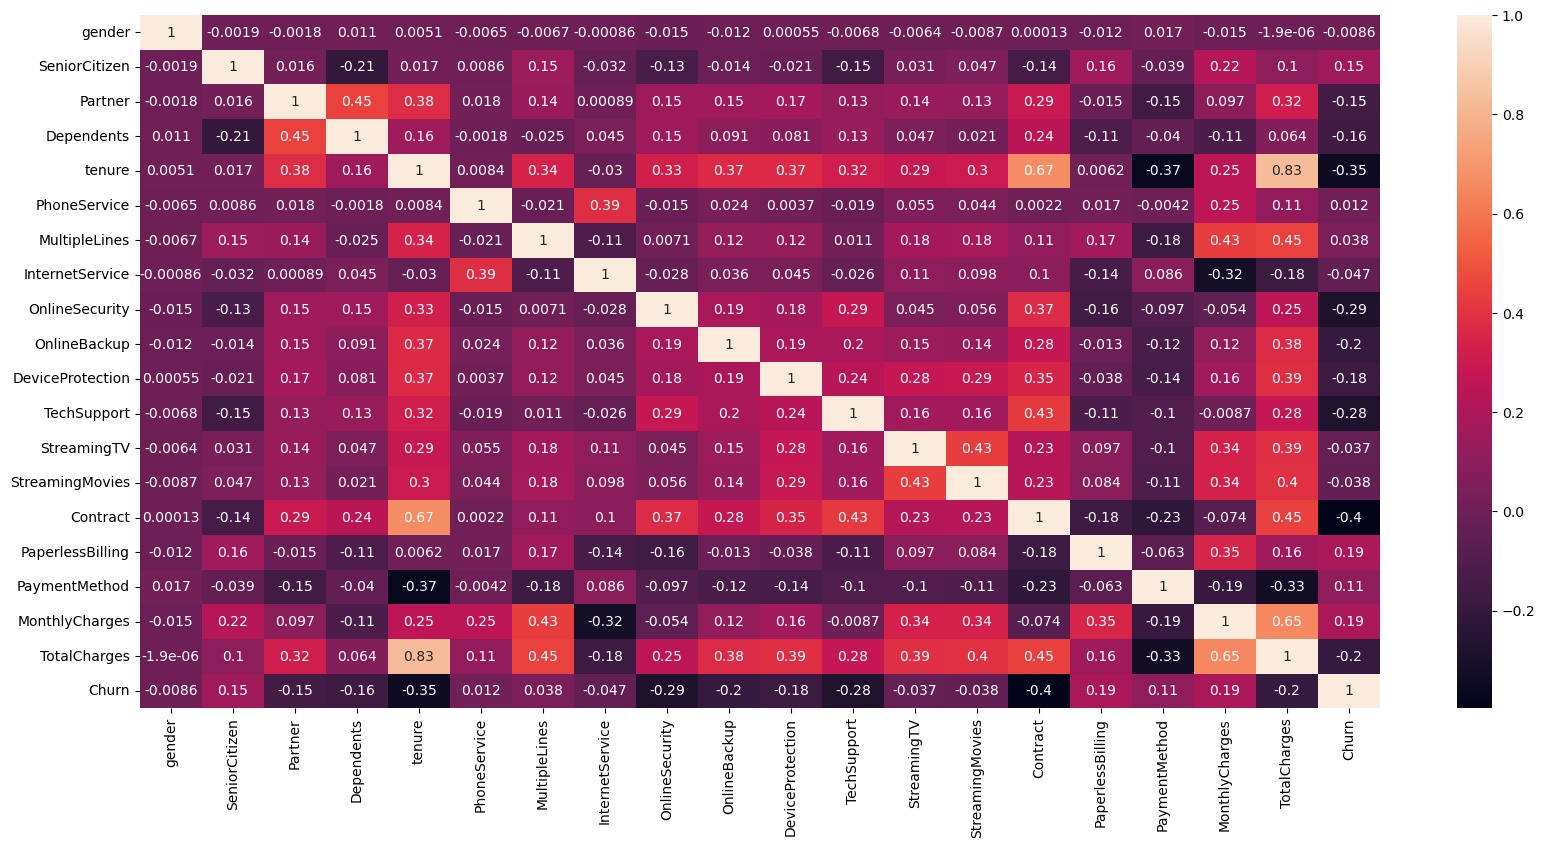

In [89]:
# Finding the correlation between the independent and dependent feature
plt.figure(figsize=(20, 9))
sns.heatmap(df.corr(), annot=True)

In [90]:

# splitting dataset into dependent and independent feature
X = df.drop(columns='Churn')
y = df['Churn']

In [38]:
X.head()


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65


In [39]:

# selects the feature which has more correlation
selection = SelectKBest()  # k=10 default
X = selection.fit_transform(X,y)

In [40]:
#  this will shows which feature are taken denote as True other are removed like false
selection.get_support()

array([False, False, False,  True,  True, False, False, False,  True,
        True,  True,  True, False, False,  True,  True, False,  True,
        True])

In [41]:
# splitting for train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [42]:
X_train.shape

(5634, 10)

In [43]:
X_test.shape


(1409, 10)

In [44]:
# its an imbalance dataset
y.value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

In [46]:
Log_reg = LogisticRegression(C=150, max_iter=150)
Log_reg.fit(X_train, y_train)
log_pred = Log_reg.predict(X_test)

print(f'Accuracy score : {accuracy_score(log_pred, y_test)}')
print(f'Confusion matrix :\n {confusion_matrix(log_pred, y_test)}')
print(f'Classification report :\n {classification_report(log_pred, y_test)}')

Accuracy score : 0.8026969481902059
Confusion matrix :
 [[912 152]
 [126 219]]
Classification report :
               precision    recall  f1-score   support

           0       0.88      0.86      0.87      1064
           1       0.59      0.63      0.61       345

    accuracy                           0.80      1409
   macro avg       0.73      0.75      0.74      1409
weighted avg       0.81      0.80      0.81      1409



In [47]:
# Random forest classifier
Rfc = RandomForestClassifier(n_estimators=120,criterion='gini', max_depth=15, min_samples_leaf=10, min_samples_split=5)
Rfc.fit(X_train, y_train)
rfc_pred = Rfc.predict(X_test)

print(f'Accuracy score : {accuracy_score(rfc_pred, y_test)}')
print(f'Confusion matrix :\n {confusion_matrix(rfc_pred, y_test)}')
print(f'Classification report :\n {classification_report(rfc_pred, y_test)}')

Accuracy score : 0.78708303761533
Confusion matrix :
 [[924 186]
 [114 185]]
Classification report :
               precision    recall  f1-score   support

           0       0.89      0.83      0.86      1110
           1       0.50      0.62      0.55       299

    accuracy                           0.79      1409
   macro avg       0.69      0.73      0.71      1409
weighted avg       0.81      0.79      0.79      1409



In [48]:
# decisionTree Classifier
Dtc = DecisionTreeClassifier(criterion='gini', splitter='random', min_samples_leaf=15)
Dtc.fit(X_train, y_train)
dtc_pred = Dtc.predict(X_test)

print(f'Accuracy score : {accuracy_score(dtc_pred, y_test)}')
print(f'Confusion matrix :\n {confusion_matrix(dtc_pred, y_test)}')
print(f'Classification report :\n {classification_report(dtc_pred, y_test)}')

Accuracy score : 0.7913413768630234
Confusion matrix :
 [[927 183]
 [111 188]]
Classification report :
               precision    recall  f1-score   support

           0       0.89      0.84      0.86      1110
           1       0.51      0.63      0.56       299

    accuracy                           0.79      1409
   macro avg       0.70      0.73      0.71      1409
weighted avg       0.81      0.79      0.80      1409



In [49]:
st=SMOTEENN()
X_train_st,y_train_st = st.fit_resample(X_train, y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_st)))

The number of classes before fit Counter({0: 4136, 1: 1498})
The number of classes after fit Counter({1: 2455, 0: 2131})


In [50]:
# splitting the over sampling dataset 
X_train_sap, X_test_sap, y_train_sap, y_test_sap = train_test_split(X_train_st, y_train_st, test_size=0.2)


In [51]:
# decisionTree Classifier
Dtc_sampling = DecisionTreeClassifier(criterion = "gini",random_state = 100,max_depth=7, min_samples_leaf=15)
Dtc_sampling.fit(X_train_sap, y_train_sap)
dtc_sampling_pred = Dtc_sampling.predict(X_test_sap)

print(f'Accuracy score : {accuracy_score(dtc_sampling_pred, y_test_sap)}')
print(f'Confusion matrix :\n {confusion_matrix(dtc_sampling_pred, y_test_sap)}')
print(f'Classification report :\n {classification_report(dtc_sampling_pred, y_test_sap)}')

Accuracy score : 0.9291938997821351
Confusion matrix :
 [[384  24]
 [ 41 469]]
Classification report :
               precision    recall  f1-score   support

           0       0.90      0.94      0.92       408
           1       0.95      0.92      0.94       510

    accuracy                           0.93       918
   macro avg       0.93      0.93      0.93       918
weighted avg       0.93      0.93      0.93       918



In [52]:
# Random forest classifier
Rfc_sampling = RandomForestClassifier(n_estimators=150,criterion='gini', max_depth=15, min_samples_leaf=10, min_samples_split=6)
Rfc_sampling.fit(X_train_sap, y_train_sap)
rfc_sampling_pred = Rfc_sampling.predict(X_test_sap)

print(f'Accuracy score : {accuracy_score(rfc_sampling_pred, y_test_sap)}')
print(f'Confusion matrix :\n {confusion_matrix(rfc_sampling_pred, y_test_sap)}')
print(f'Classification report :\n {classification_report(rfc_sampling_pred, y_test_sap)}')

Accuracy score : 0.9520697167755992
Confusion matrix :
 [[404  23]
 [ 21 470]]
Classification report :
               precision    recall  f1-score   support

           0       0.95      0.95      0.95       427
           1       0.95      0.96      0.96       491

    accuracy                           0.95       918
   macro avg       0.95      0.95      0.95       918
weighted avg       0.95      0.95      0.95       918



In [53]:
# logistic regression
Log_reg_sampling = LogisticRegression(C=10, max_iter=150)
Log_reg_sampling.fit(X_train_sap, y_train_sap)
Log_sampling_pred = Log_reg_sampling.predict(X_test_sap)

print(f'Accuracy score : {accuracy_score(Log_sampling_pred, y_test_sap)}')
print(f'Confusion matrix :\n {confusion_matrix(Log_sampling_pred, y_test_sap)}')
print(f'Classification report :\n {classification_report(Log_sampling_pred, y_test_sap)}')

Accuracy score : 0.9226579520697168
Confusion matrix :
 [[394  40]
 [ 31 453]]
Classification report :
               precision    recall  f1-score   support

           0       0.93      0.91      0.92       434
           1       0.92      0.94      0.93       484

    accuracy                           0.92       918
   macro avg       0.92      0.92      0.92       918
weighted avg       0.92      0.92      0.92       918



In [54]:
# GradientBoostingClassifier
gbc = GradientBoostingClassifier()
gbc.fit(X_train_sap, y_train_sap)
pred = gbc.predict(X_test_sap)

print(f'Accuracy score : {accuracy_score(pred, y_test_sap)}')
print(f'Confusion matrix :\n {confusion_matrix(pred, y_test_sap)}')
print(f'Classification report :\n {classification_report(pred, y_test_sap)}')

Accuracy score : 0.9629629629629629
Confusion matrix :
 [[409  18]
 [ 16 475]]
Classification report :
               precision    recall  f1-score   support

           0       0.96      0.96      0.96       427
           1       0.96      0.97      0.97       491

    accuracy                           0.96       918
   macro avg       0.96      0.96      0.96       918
weighted avg       0.96      0.96      0.96       918



In [55]:
param_grid = {'n_estimators':[100, 150, 200, 250, 300],
             'criterion': ['friedman_mse', 'squared_error', 'mse', 'mae'],
             'min_samples_split': [2,3,4,5,6,7,8,9,10],
             'min_samples_leaf': [1,3,5,7,9,11,13,15],'max_leaf_nodes': [3,6,8,9,12,15,18,24],
              'max_depth': [3,5,7,9,11,13,15,17,19],
              'learning_rate': [0.05, 0.1, 0.2, 0.3, 0.4, 0.5],
              'loss': ['deviance', 'exponential']
              }


In [56]:
gbc_optm = RandomizedSearchCV(estimator=gbc, param_distributions=param_grid,n_iter=100, verbose=3)
gbc_optm.fit(X_train_sap, y_train_sap)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV 1/5] END criterion=mae, learning_rate=0.2, loss=deviance, max_depth=11, max_leaf_nodes=6, min_samples_leaf=13, min_samples_split=8, n_estimators=150;, score=nan total time=   0.0s
[CV 2/5] END criterion=mae, learning_rate=0.2, loss=deviance, max_depth=11, max_leaf_nodes=6, min_samples_leaf=13, min_samples_split=8, n_estimators=150;, score=nan total time=   0.0s
[CV 3/5] END criterion=mae, learning_rate=0.2, loss=deviance, max_depth=11, max_leaf_nodes=6, min_samples_leaf=13, min_samples_split=8, n_estimators=150;, score=nan total time=   0.0s
[CV 4/5] END criterion=mae, learning_rate=0.2, loss=deviance, max_depth=11, max_leaf_nodes=6, min_samples_leaf=13, min_samples_split=8, n_estimators=150;, score=nan total time=   0.0s
[CV 5/5] END criterion=mae, learning_rate=0.2, loss=deviance, max_depth=11, max_leaf_nodes=6, min_samples_leaf=13, min_samples_split=8, n_estimators=150;, score=nan total time=   0.0s
[CV 1/5] END crit

RandomizedSearchCV(estimator=GradientBoostingClassifier(), n_iter=100,
                   param_distributions={'criterion': ['friedman_mse',
                                                      'squared_error', 'mse',
                                                      'mae'],
                                        'learning_rate': [0.05, 0.1, 0.2, 0.3,
                                                          0.4, 0.5],
                                        'loss': ['deviance', 'exponential'],
                                        'max_depth': [3, 5, 7, 9, 11, 13, 15,
                                                      17, 19],
                                        'max_leaf_nodes': [3, 6, 8, 9, 12, 15,
                                                           18, 24],
                                        'min_samples_leaf': [1, 3, 5, 7, 9, 11,
                                                             13, 15],
                                        'min_samples_split': [2, 3, 4, 5, 6, 7,
                                                              8, 9, 10],
                                        'n_estimators': [100, 150, 200, 250,
                                                         300]},
                   verbose=3)

In [57]:
gbc_optm.best_estimator_


GradientBoostingClassifier(criterion='squared_error', learning_rate=0.5,
                           loss='exponential', max_depth=19, max_leaf_nodes=12,
                           min_samples_leaf=3, min_samples_split=5,
                           n_estimators=150)

In [58]:
# GradientBoostingClassifier
gbc_tunning = GradientBoostingClassifier(criterion='squared_error', learning_rate=0.3,
                           max_depth=19, max_leaf_nodes=24, min_samples_leaf=9,
                           min_samples_split=7, n_estimators=150)
gbc_tunning.fit(X_train_sap, y_train_sap)
pred = gbc_tunning.predict(X_test_sap)

print(f'Accuracy score : {accuracy_score(pred, y_test_sap)}')
print(f'Confusion matrix :\n {confusion_matrix(pred, y_test_sap)}')
print(f'Classification report :\n {classification_report(pred, y_test_sap)}')

Accuracy score : 0.971677559912854
Confusion matrix :
 [[412  13]
 [ 13 480]]
Classification report :
               precision    recall  f1-score   support

           0       0.97      0.97      0.97       425
           1       0.97      0.97      0.97       493

    accuracy                           0.97       918
   macro avg       0.97      0.97      0.97       918
weighted avg       0.97      0.97      0.97       918



In [59]:
import pickle


In [60]:
filename = 'Model.sav'
pickle.dump(gbc_tunning, open(filename,'wb'))

In [61]:
load_model = pickle.load(open(filename, 'rb'))


In [62]:
load_model.score(X_test_sap, y_test_sap)


0.971677559912854

In [63]:
Dependents = 'Yes'
tenure = 1
OnlineSecurity = 'No'
OnlineBackup = 'Yes'
DeviceProtection = 'No'
TechSupport = 'No'
Contract = 'Month-to-month'
PaperlessBilling = 'No'
MonthlyCharges = 29.85
TotalCharges = 556.85

In [91]:
df = [[Dependents, tenure, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, Contract, PaperlessBilling, MonthlyCharges, TotalCharges]]


In [93]:
df1 = pd.DataFrame(df, columns=['Dependents', 'tenure', 'OnlineSecurity',
        'OnlineBackup', 'DeviceProtection', 'TechSupport', 'Contract',
        'PaperlessBilling', 'MonthlyCharges', 'TotalCharges'])
df1.head()
print(df1.dtypes)

Dependents           object
tenure                int64
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
Contract             object
PaperlessBilling     object
MonthlyCharges      float64
TotalCharges        float64
dtype: object


In [94]:
for feature in df1.columns:
    if df1[feature].dtypes == 'O':
        categorical_feature = feature
        print(categorical_feature)

Dependents
OnlineSecurity
OnlineBackup
DeviceProtection
TechSupport
Contract
PaperlessBilling


In [95]:
encoder = LabelEncoder()
for feature in df1.columns:
    if df1[feature].dtypes == 'O':
        df1[feature] = encoder.fit_transform(df1[feature])

In [96]:
df1.head()



,Dependents,tenure,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,Contract,PaperlessBilling,MonthlyCharges,TotalCharges
0,0,1,0,0,0,0,0,0,29.85,556.85


In [97]:
single = load_model.predict(df1)
probability = load_model.predict_proba(df1)[:,1]

In [70]:
print(single)


[1]


In [71]:
print(probability)


[0.65333848]


In [98]:
if single == 1:
    print("This Customer is likely to be Churned!")
    print(f"Confidence level is {np.round(probability*100, 2)}")
else:
    print("This Customer is likely to be Continue!")
    print(f"Confidence level is {np.round(probability*100, 2)}")

This Customer is likely to be Churned!
Confidence level is [65.33]
